In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('capm_ weightingdata.csv', encoding='gb2312')
col = data.columns
col = col[1:]
industry_col = col[:-1]
col_len = len(col)
time_len = len(data)

for industry_name in col:

    data['temp'] = data[industry_name].shift(1)
    data[industry_name + '_rate'] = (data[industry_name] / data['temp']) - 1
    data[industry_name + '_beta'] = None
    data[industry_name + '_rate_rank'] = None
    data[industry_name + '_beta_rank'] = None
time_array = np.array(data['日期'])


In [38]:
for week_index in range(99, time_len):
    temp_time = time_array[week_index-98 :week_index]
    select_data = data[data['日期'].isin(temp_time)]
#     print(select_data.index)
    x = select_data['全部A股_rate']
#     print(select_data['全部A股_rate'])
    for  industry_name in col[:-1]:
        y = select_data[industry_name + '_rate']
        line_para = np.polyfit(x.astype(float), y.astype(float), 1)
        data.ix[week_index, industry_name + '_beta'] = line_para[0]
#         print(week_index, industry_name + '_beta')
#         xl = np.arange(0,200)
#         xl = xl/1000-0.1
#         print(xl)
#         yl = xl*line_para[0] + line_para[1]
#         plt.rcParams['font.sans-serif']=['SimHei']
#         plt.rcParams['axes.unicode_minus']=False
#         plt.title(str(line_para[0]))
#         plt.xlabel('全a')
#         plt.ylabel(industry_name)
#         plt.scatter(x, y, c='r')
#         plt.scatter(xl, yl, c='b')
#         plt.show()
#         print (line_para, industry_name, x.mean(), y.mean())

In [39]:
data['r'] = None
for week_index in range(99, time_len):
    temp_time = [time_array[week_index]]
    temp_data = data[data['日期'].isin(temp_time)]
#     print(temp_data)
    temp_list = []
    sum = 0
    for industry_name in industry_col:
        temp_list.append([str(industry_name), np.float32(temp_data[industry_name + '_rate']), np.float32(temp_data[industry_name + '_beta'])])
    temp_list.sort(key = lambda x: x[1])
    for i in range(len(temp_list)):
        rank = i + 1
        temp_list[i].append(rank)
    temp_list.sort(key = lambda x: x[2])
    for i in range(len(temp_list)):
        rank = i + 1
        temp_list[i].append(rank)
    for i in range(len(temp_list)):
        d = temp_list[i][3] - temp_list[i][4]
        sum = d*d +sum
    r = 1 - 6*sum/(29*(29*29 - 1))
    data.ix[week_index, 'r'] = r

    for i in range(len(temp_list)):
        data.ix[week_index, temp_list[i][0]+'_rate_rank'] = temp_list[i][3]
        data.ix[week_index, temp_list[i][0]+'_beta_rank'] = temp_list[i][4]

In [115]:
data['r_ma'] = data['r'].rolling(4).mean()
last_r = 0
buy_list = []
sell_list = []
last_sb = 0
for week_index in range(99, time_len):
    temp_time = [time_array[week_index]]
    temp_data = data[data['日期'].isin(temp_time)]
    r= np.float32(temp_data['r_ma'])

    if r>= 0.128 and last_r>=0.128 and last_sb != 1:
        print (r, last_r, last_sb)
        buy_list.append(temp_time)
        last_sb = 1
    if r <= -0.128 and last_r<=-0.128 and last_sb !=-1:
        print (r, last_r, last_sb)
        sell_list.append(temp_time)
        last_sb =-1
    last_r = r

d:\python\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater_equal
  # This is added back by InteractiveShellApp.init_path()
d:\python\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in less_equal
  from ipykernel import kernelapp as app


[ 0.18694581] [ 0.14458129] 0
[-0.26674876] [-0.16995074] 1
[ 0.20788178] [ 0.16182266] -1
[-0.1593596] [-0.18657635] 1
[ 0.13325123] [ 0.18731527] -1
[-0.13990147] [-0.17795567] 1
[ 0.37721676] [ 0.21662562] -1
[-0.20160098] [-0.12881774] 1
[ 0.16317734] [ 0.14593597] -1
[-0.45431036] [-0.28879312] 1
[ 0.1658867] [ 0.21108374] -1
[-0.29433498] [-0.1364532] 1
[ 0.13337438] [ 0.14027093] -1
[-0.22610837] [-0.25209358] 1
[ 0.25960591] [ 0.16096058] -1
[-0.44347289] [-0.36305419] 1
[ 0.2429803] [ 0.21884236] -1
[-0.16268472] [-0.17352217] 1
[ 0.14224137] [ 0.16502462] -1
[-0.31440887] [-0.35874385] 1
[ 0.15086207] [ 0.30036947] -1
[-0.1633005] [-0.2385468] 1


In [116]:
a_data = data['全部A股']

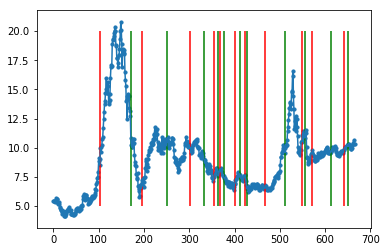

In [117]:
plt.plot(a_data)
plt.scatter(range(len(a_data)), a_data, s=10)
for i in buy_list:
    x_index = data[data['日期'] == i[0]].index[0]
    plt.vlines(x=x_index, ymax=20, ymin=5, colors='r')
for i in sell_list:
    x_index = data[data['日期'] == i[0]].index[0]
    plt.vlines(x=x_index, ymax=20, ymin=5, colors='g')
plt.show()


In [122]:
data[data['日期'].isin(['2007-02-02','2007-02-09'])][['r','r_ma']]


,r,r_ma
102,0.0615764,0.144581
103,0.451232,0.186946


In [130]:
data[data['日期'].isin(['2008-01-11','2008-02-22','2008-02-29','2008-03-07','2008-03-14','2008-03-21','2008-03-28'])][['日期','r','r_ma']]

,日期,r,r_ma
149,2008-01-11,-0.0418719,0.062808
155,2008-02-22,0.448768,0.205296
156,2008-02-29,0.0985222,0.240394
157,2008-03-07,0.376847,0.294335
158,2008-03-14,-0.102463,0.205419
159,2008-03-21,-0.255172,0.029433
160,2008-03-28,-0.280296,-0.065271


In [125]:
list(data['日期'])

['2005-01-07',
 '2005-01-14',
 '2005-01-21',
 '2005-01-28',
 '2005-02-04',
 '2005-02-18',
 '2005-02-25',
 '2005-03-04',
 '2005-03-11',
 '2005-03-18',
 '2005-03-25',
 '2005-04-01',
 '2005-04-08',
 '2005-04-15',
 '2005-04-22',
 '2005-04-29',
 '2005-05-13',
 '2005-05-20',
 '2005-05-27',
 '2005-06-03',
 '2005-06-10',
 '2005-06-17',
 '2005-06-24',
 '2005-07-01',
 '2005-07-08',
 '2005-07-15',
 '2005-07-22',
 '2005-07-29',
 '2005-08-05',
 '2005-08-12',
 '2005-08-19',
 '2005-08-26',
 '2005-09-02',
 '2005-09-09',
 '2005-09-16',
 '2005-09-23',
 '2005-09-30',
 '2005-10-14',
 '2005-10-21',
 '2005-10-28',
 '2005-11-04',
 '2005-11-11',
 '2005-11-18',
 '2005-11-25',
 '2005-12-02',
 '2005-12-09',
 '2005-12-16',
 '2005-12-23',
 '2005-12-30',
 '2006-01-06',
 '2006-01-13',
 '2006-01-20',
 '2006-01-25',
 '2006-02-10',
 '2006-02-17',
 '2006-02-24',
 '2006-03-03',
 '2006-03-10',
 '2006-03-17',
 '2006-03-24',
 '2006-03-31',
 '2006-04-07',
 '2006-04-14',
 '2006-04-21',
 '2006-04-28',
 '2006-05-12',
 '2006-05-